## Solutions to exercises

**Not all solutions are complete. Some solutions required functions or variables that are already defined in the main notebooks.**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Exercise 1
We can also use ``LinearRegression`` to multi-feature data. Create a dataset that has 5 features. Calculate the coefficients and plot response vs the first feature, plot also the fitted line. 

In [53]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

X_multi, y_multi = datasets.make_regression( n_samples=30, n_features=5, n_informative=5, random_state=0, noise=75)
# just to have positive values only 
X_multi = X_multi + 3 
y_multi = y_multi + 310

regr_multi = LinearRegression()
regr_multi.fit(X_multi, y_multi)
print(regr_multi.intercept_, regr_multi.coef_)

(-338.97417947657834, array([ 35.02334271,  23.07885507,  31.33310138,  90.66941768,  30.73143952]))


### Exercise 2
Run a classification for Iris data available in ``datasets``. You can try to run model twice, first time using 2 features that have high correlation with output and second time with two less correlated features. You might also read and change parameters of the ``KNeighborsClassifier``.


In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [14]:
X_ir = iris.data
y_ir = iris.target
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
# check how many classes you have
np.unique(y_ir)

array([0, 1, 2])

Let's plot using only 2 features that has high correlation:

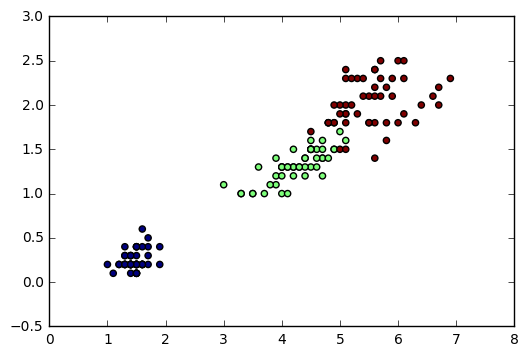

In [17]:
plt.scatter(X_ir[:, 2], X_ir[:, 3], c=y_ir, 
            edgecolor='k', s=20)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_ir[:,2:], y_ir)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Let's plot results:

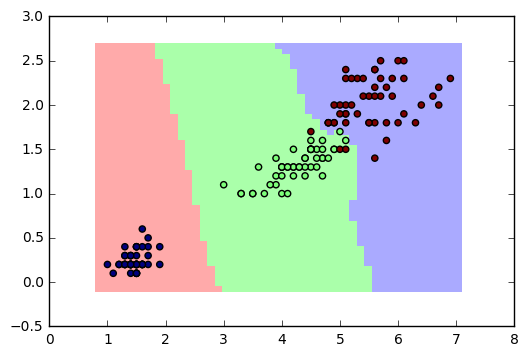

In [43]:
from matplotlib.colors import ListedColormap

def plot_iris(X_ir, y_ir, ind_x, ind_y):
    x_min, x_max = X_ir[:, ind_x].min() - 0.2, X_ir[:, ind_x].max() + 0.2
    y_min, y_max = X_ir[:, ind_y].min() - 0.2, X_ir[:, ind_y].max() + 0.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_ir[:, ind_x], X_ir[:, ind_y], c=y_ir,
                edgecolor='k', s=20)
    
plot_iris(X_ir, y_ir, ind_x=2, ind_y=3)

**We can check how the model would work if we chose the first tw features:**

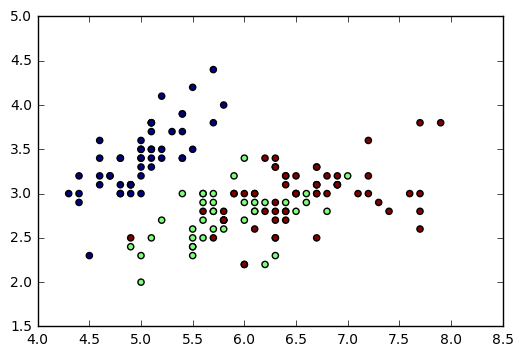

In [39]:
plt.scatter(X_ir[:, 0], X_ir[:, 1], c=y_ir, 
            edgecolor='k', s=20)

we can see that task will be harder

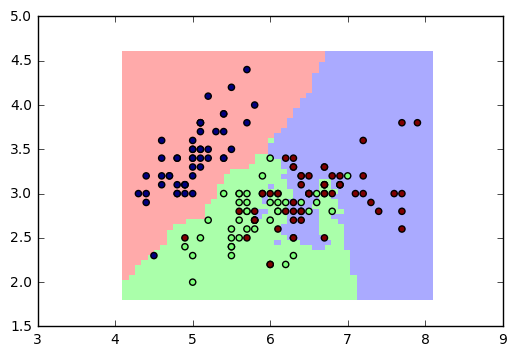

In [44]:
clf = KNeighborsClassifier()
clf.fit(X_ir[:,:2], y_ir)

plot_iris(X_ir, y_ir, ind_x=0, ind_y=1)

Still the algorithm identified correctly most of the points. You can also try to change number of neighbors.

### Exercise 3
Use PCA for the Iris dataset.

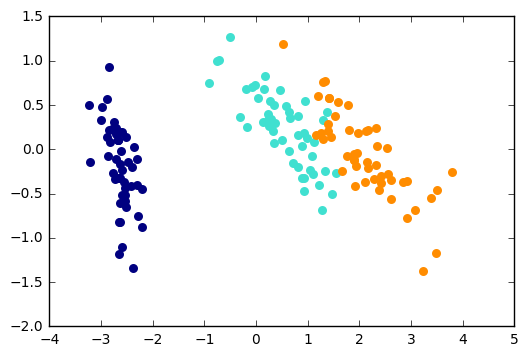

In [51]:
from sklearn.decomposition import PCA, IncrementalPCA

n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_ir)

colors = ['navy', 'turquoise', 'darkorange']
    
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y_ir == i, 0], X_pca[y_ir == i, 1],
                color=color, lw=2, label=target_name)

## Exercise 4

Using ``make_data`` function generate a new dataset with different sample size. Calculate cross validation score using one od the [splitter methods available in scikit-learn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection). See how the scores differ with the sample size.

In [ ]:
X_new, y_new = make_data(N=50)

X_new_tr, X_new_ts, y_new_tr, y_new_ts = train_test_split(X_new, y_new)

poly2new = PolynomialRegression(2)
poly2new.fit(X_new_tr, y_new_tr)
plot_regr(X_new_tr, y_new_tr, poly2new)

In [ ]:
plot_regr(X_new_ts, y_new_ts, poly2new, color="r")

In [ ]:
from sklearn.cross_validation import ShuffleSplit

scores = cross_val_score(poly2new, X_new, y_new, cv=ShuffleSplit(n=y_new.shape[0]))
print("Scores for regr: {}, mean score = {:03.2f}, std = {:03.2f}".format(scores, scores.mean(), scores.std() * 2))

### Exercise 5

Change number of neigbors in ``KNeighborsClassifier`` model and run ``permutation_test_score`` again. Try a very large number, e.g. 300, can you explain the result? 

In [72]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

X_can = cancer.data
y_can = cancer.target

In [74]:
from sklearn.cross_validation import permutation_test_score
clf = KNeighborsClassifier(n_neighbors=300)
score, permutation_scores, pvalue = permutation_test_score(
    clf, X_can, y_can, scoring="accuracy", cv=None, n_permutations=1000, n_jobs=1)
print("Classification score %s (pvalue : %s)" % (score, pvalue))

Classification score 0.627420402859 (pvalue : 0.516483516484)


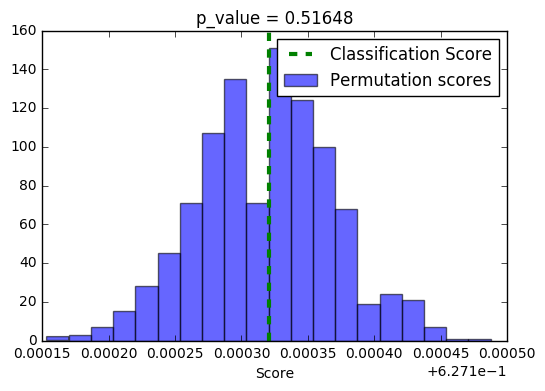

In [75]:
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black', alpha=0.6)
ylim = plt.ylim()

plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score')
plt.title("p_value = {:06.5f}".format(pvalue))
plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

### Exercise 6

Run permutation test score for the model build for Iris data. You can use original data or after PCA.

In [79]:
clf_ir = KNeighborsClassifier()

score_ir, permutation_scores_ir, pvalue_ir = permutation_test_score(
    clf_ir, X_pca, y_ir, scoring="accuracy", cv=None, n_permutations=1000, n_jobs=1)
print("Classification score %s (pvalue : %s)" % (score, pvalue))

Classification score 0.966911764706 (pvalue : 0.000999000999001)


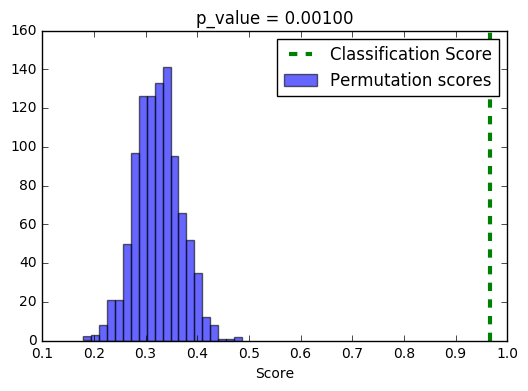

In [80]:
plt.hist(permutation_scores_ir, 20, label='Permutation scores',
         edgecolor='black', alpha=0.6)
ylim = plt.ylim()

plt.plot(2 * [score_ir], ylim, '--g', linewidth=3,
         label='Classification Score')
plt.title("p_value = {:06.5f}".format(pvalue_ir))
plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

### Exercise 6

Validate the model using ``cross_val_score``.

### Exercise 7
Check if KNeighborsClassifier would work for this dataset. Validate the model in the same way as SVC.

### Exercise 8

Try to run model using all conditions. Does the new model has as high score as the one with two conditions only? Which conditions is the easiest to identify by the model and which one is the hardest?